<a href="https://colab.research.google.com/github/ctg123/ml-projects/blob/main/facial-recognition-cnn/face_recognition_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the relevant packages and necessary dependencies

In [ ]:
# Python built-in libraries
from pathlib import Path

# Data pre-processing and visualization
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sci-kit learn functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For model training and compilation
from keras import layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.callbacks import EarlyStopping

## Upload and import the data

Let's load and normalize the images

In [ ]:
image_dir = Path('datasets/ORL_face_database')

image_dir

WindowsPath('datasets/ORL_face_database')

In [ ]:
# Create empty arrays to store the training and test images and labels:
images = []
labels = []

In [ ]:
# Iterate over the subdirectories of the dataset (representing different classes or labels)
for person_dir in image_dir.iterdir():
    if person_dir.is_dir():
        label = int(person_dir.name[1:])

        for image_file in person_dir.iterdir():
            image = cv2.imread(str(image_file))
            grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            numpy_image = np.array(grayscale_image)

            # Append images and labels directly to the trainX and trainY lists
            images.append(numpy_image)
            labels.append(label)

In [ ]:
# Convert the image data and labels into NumPy arrays
images = np.array(images)
images = images.astype("float32") / 255  # Normalize the images
labels = np.array(labels)

In [ ]:
print(f'normalized image data: {images[:]}')
print('\n')
# Check the shapes after modifications
print(f"numpy images shape: {images.shape}")
print(f"labels: {labels.shape}")

normalized image data: [[[0.1882353  0.19215687 0.1764706  ... 0.21960784 0.21960784 0.21176471]
  [0.1764706  0.20392157 0.15294118 ... 0.20392157 0.19607843 0.2       ]
  [0.1764706  0.19607843 0.16470589 ... 0.1882353  0.20784314 0.19607843]
  ...
  [0.19607843 0.1882353  0.19607843 ... 0.1764706  0.18039216 0.18039216]
  [0.1764706  0.21176471 0.19215687 ... 0.18039216 0.18431373 0.18431373]
  [0.2        0.2        0.2        ... 0.18431373 0.18039216 0.18039216]]

 [[0.13333334 0.13333334 0.12941177 ... 0.00392157 0.00392157 0.00392157]
  [0.13725491 0.11764706 0.1254902  ... 0.14901961 0.18431373 0.15294118]
  [0.13333334 0.10980392 0.12156863 ... 0.21568628 0.23137255 0.19215687]
  ...
  [0.11764706 0.11372549 0.12156863 ... 0.13725491 0.14509805 0.16078432]
  [0.12156863 0.11372549 0.1254902  ... 0.16470589 0.13333334 0.15294118]
  [0.10980392 0.12941177 0.10588235 ... 0.14509805 0.15686275 0.12941177]]

 [[0.23529412 0.23529412 0.24313726 ... 0.15686275 0.20784314 0.18039216]

## Let's visualize the Images and Train and Test Dataset

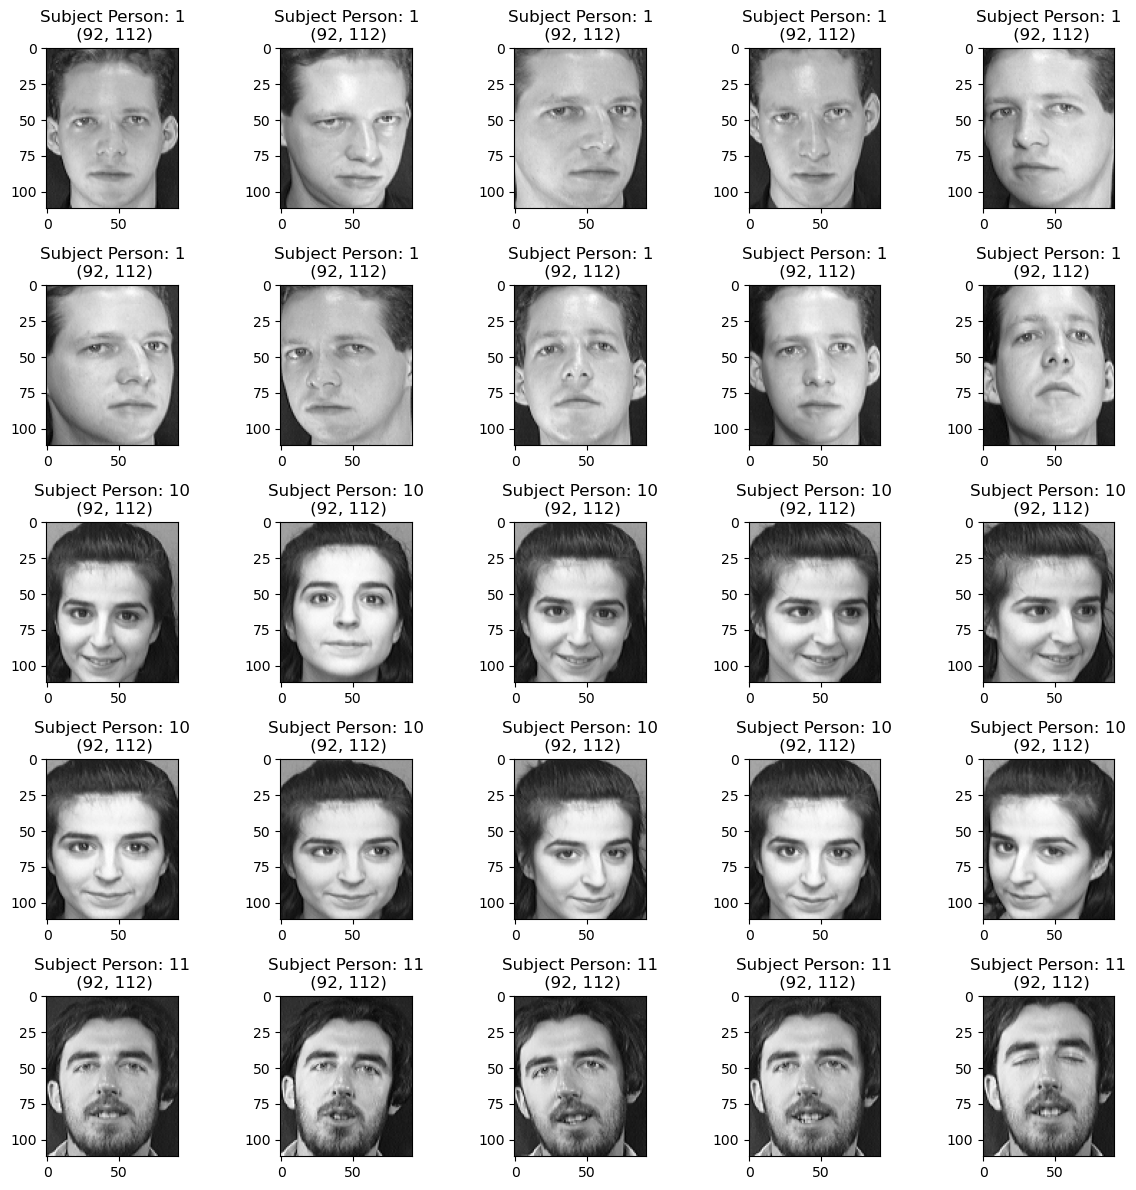

In [ ]:
# Define the number of images you want to plot
num_images_to_plot = 25  # Change this number as needed

# Reshape the images to (112, 92)
# Assuming x_train has shape (num_samples, 112, 92)
reshaped_images = images[:num_images_to_plot].reshape(-1, 112, 92)

# Plot the images
plt.figure(figsize=(12, 12))
for i in range(num_images_to_plot):
    plt.subplot(5, 5, i + 1)  # Change the subplot layout as per your preference
    plt.imshow(reshaped_images[i], cmap='gray')
    # Set the title as per the corresponding label
    plt.title(f'Subject Person: {labels[i]}\n ({reshaped_images[i].shape[1]}, {reshaped_images[i].shape[0]})')
    #plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()

## Split the Data into Train, Test and Validation Sets

In [ ]:
X_data = images # store images in X_data
Y_data = labels.reshape(-1,1) # store labels in Y_data

# Find unique classes in the labels
unique_labels = np.unique(Y_data)

unique_labels

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

In [ ]:
# Reindex the labels to start from 0
label_mapping = {label: index for index, label in enumerate(unique_labels)}
Y_data_reindexed = np.array([label_mapping[label[0]] for label in Y_data])

# Verify the unique values in the reindexed labels
print(np.unique(Y_data_reindexed))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


1. Initial Training and Test Split:
    - Initially, you've split the data into x_train (training data) and x_test (test data).
2. Create Validation Set:
    - To generate a validation set from the existing training data (x_train), you can perform another split. This split will create a subset designated for validation purposes.

In [ ]:
# take a random sample: 80% of the data for the test set

# The resulting variables will represent:
# x_train: Training data
# y_train: Corresponding training labels
# x_test: Test data
# y_test: Corresponding test labels

x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data_reindexed, test_size=0.2, random_state=42)

print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (320, 112, 92)
x_test: (80, 112, 92)
y_train: (320,)
y_test: (80,)


In [ ]:
# Split the training data further into x_train, x_val, y_train, y_val

# The resulting variables will represent:
# x_val: Validation data
# y_val: Corresponding validation labels

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, random_state=42)

print(f'x_train: {x_train.shape}')
print(f'x_val: {x_val.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')

x_train: (304, 112, 92)
x_val: (16, 112, 92)
y_train: (304,)
y_val: (16,)


* `x_train`, `y_train`: These represent the primary training dataset and labels, comprising 60% of the original data (80% of 80%).
* `x_test`, `y_test`: These represent the test dataset and labels, comprising 20% of the original data.
* `x_val`, `y_val`: These represent the validation dataset and labels, comprising 5% of the original dataset.

### Check the images are equal sizes to prepare the data for input to the CNN model

In [ ]:
# Assuming x_train and x_val contain the image data
# Reshape the input data to match the expected input shape
x_train = x_train.reshape(-1, 112, 92, 1)
x_test = x_test.reshape(-1, 112, 92, 1)
x_val = x_val.reshape(-1, 112, 92, 1)
input_shape = (x_train.shape[1], x_train.shape[2], 1)

print(f'Input Shape: {input_shape}')
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'x_val: {x_val.shape}')

Input Shape: (112, 92, 1)
x_train: (304, 112, 92, 1)
x_test: (80, 112, 92, 1)
x_val: (16, 112, 92, 1)


In [ ]:
# Convert labels to categorical format
num_classes = len(np.unique(Y_data_reindexed))

# Convert integer labels to one-hot encoded labels
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)
y_val_categorical = to_categorical(y_val, num_classes)

print(f'The number of the classes: {num_classes}')
print(f'y_train categorical shape: {y_train_categorical.shape}')
print(f'y_test categorical shape: {y_test_categorical.shape}')
print(f'y_val categorical shape: {y_val_categorical.shape}')

The number of the classes: 40
y_train categorical shape: (304, 40)
y_test categorical shape: (80, 40)
y_val categorical shape: (16, 40)


## Build the CNN Model

1. Convolotional layer
2. pooling layer
3. fully connected layer

Let's build a new architecture of CNN by changing the number and position of layers.

In [ ]:
# Adding the hidden layers and the output layer to our model
cnn_model = Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape= input_shape),
layers.BatchNormalization(),
layers.MaxPooling2D((2, 2)),
#layers.BatchNormalization(),
layers.Conv2D(64, (3, 3), activation='relu', input_shape= input_shape), # Additional Conv2D layer
#layers.BatchNormalization(),
layers.MaxPooling2D((2, 2)),

# Fully Connected
layers.Flatten(),

layers.Dense(256, activation='relu'),
# Dense layers with Dropout
layers.Dropout(0.5),
layers.Dense(128, activation='relu'),
#layers.Dropout(0.5),
layers.Dense(num_classes, activation='softmax')
])

# Display the summary of the model architecture and the number of parameters
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 90, 32)       320       
                                                                 
 batch_normalization (Batch  (None, 110, 90, 32)       128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 55, 45, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 43, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 26, 21, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Model

Train the model with `100` epochs and we'll plot training loss and accuracy against epochs. We want to monitor the validation loss at each epoch and after the validation loss has not improved after `10` epochs, training is interrupted.

In [ ]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

In [ ]:
history = cnn_model.fit(np.array(x_train), y_train_categorical,
                        epochs=100,
                        verbose=2,
                        validation_data=(np.array(x_val), y_val_categorical),
                        callbacks=[early_stopping])

Epoch 1/100
10/10 - 3s - loss: 5.8093 - accuracy: 0.0296 - val_loss: 3.6969 - val_accuracy: 0.0000e+00 - 3s/epoch - 295ms/step
Epoch 2/100
10/10 - 2s - loss: 3.6454 - accuracy: 0.0822 - val_loss: 3.6896 - val_accuracy: 0.0625 - 2s/epoch - 176ms/step
Epoch 3/100
10/10 - 2s - loss: 3.4100 - accuracy: 0.1250 - val_loss: 3.6901 - val_accuracy: 0.0000e+00 - 2s/epoch - 175ms/step
Epoch 4/100
10/10 - 2s - loss: 3.0662 - accuracy: 0.2138 - val_loss: 3.6898 - val_accuracy: 0.0000e+00 - 2s/epoch - 180ms/step
Epoch 5/100
10/10 - 2s - loss: 2.8257 - accuracy: 0.2401 - val_loss: 3.6881 - val_accuracy: 0.0000e+00 - 2s/epoch - 178ms/step
Epoch 6/100
10/10 - 2s - loss: 2.3740 - accuracy: 0.3520 - val_loss: 3.6830 - val_accuracy: 0.0000e+00 - 2s/epoch - 176ms/step
Epoch 7/100
10/10 - 2s - loss: 2.1840 - accuracy: 0.3651 - val_loss: 3.6751 - val_accuracy: 0.0625 - 2s/epoch - 179ms/step
Epoch 8/100
10/10 - 2s - loss: 1.7326 - accuracy: 0.4836 - val_loss: 3.6649 - val_accuracy: 0.0625 - 2s/epoch - 174ms/s

## Evaluate the score

In [ ]:
score = cnn_model.evaluate( np.array(x_test), np.array(y_test_categorical), verbose=0)

print(f'test loss: {score[0]*100:.4f}')
print(f'test accuracy: {score[1]*100:.2f} %')

test loss: 21.4268
test accuracy: 91.25 %


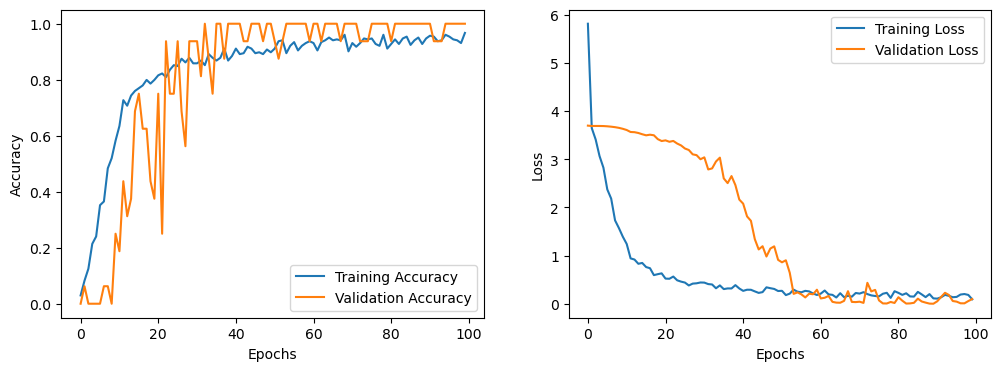

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Summary

To summarize all the steps implemented to build a CNN Model for the ORL database of faces are provided in order below.

1. Data Loading and Preprocessing:
    - Images are loaded and normalized in the range [0, 1].
    - The initial visualization ensures the images and labels are loaded correctly.
    
2. Training, Test, and Validation data splitting:
    - The dataset is split into training and validation sets using `train_test_split()` from sklearn.model_selection.
    - The split is 80% for training and 20% for test. This splitting helps in evaluating model performance while training.
    - Another split of 5% of the data is made for validation purposes. This is because the number of images in the dataset overall is very low.
    
3. Data Shape Check:
    - Reshaping is performed to ensure all images have the same dimensions `(112x92x1)` suitable for input to the CNN model.
    - Labels are converted into categorical format using to_categorical() from keras.utils.
    
4. CNN Model Architecture:
    - The defined CNN model comprises two Conv2D layers followed by MaxPooling layers.
    - Dense layers with ReLU activations are included, along with dropout layers for regularization to prevent overfitting.
    - Batch Normalization layers are also added for better convergence during training.
    
5. Model Compilation and Training:
    - The model is compiled with 'adam' optimizer and 'categorical_crossentropy' loss.
    - Model training (fit()) is performed using the training and validation data.
    - Training history is stored to analyze the model's performance over epochs.
    
6. Model Evaluation:
    - The trained model is evaluated on the validation set to calculate loss and accuracy.
    - Finally, accuracy and loss curves are plotted to visualize the model's training and validation performance.